In [1]:
# get the weatherdat
import pandas as pd
import seaborn as sns
import folium
import folium.plugins
import warnings
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# import torch
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from matplotlib.pyplot import rc


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
# condsider three factors which may affects the accidents
# 1. Weather 
# 2. ROADWAY SURFACE CONDITION
# 3. Light condition

# read the original file and cleaning data
df = pd.read_csv("WA_Rural_St_RtesCrashes_Full.csv")
# df.head()
columns = ['REPORT NUMBER',
           'WEATHER',
           'ROADWAY SURFACE CONDITION',
           'LIGHTING CONDITION',
           'MOST SEVERE INJURY TYPE']
df_clean = df[columns]

# cleanning the na data
df_clean = df_clean.dropna()


In [4]:
# accidents severity
severity_group = df_clean.groupby('MOST SEVERE INJURY TYPE')
s = df.groupby(['MOST SEVERE INJURY TYPE']).median().index.get_level_values('MOST SEVERE INJURY TYPE').tolist()
s = ['Unknown', 'No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', 'Died in Hospital', 'Dead on Arrival', 'Dead at Scene']
print(s)
severity_names = s
# convert the severity to number
severity_list= []

for condition in df_clean['MOST SEVERE INJURY TYPE']:
    severity_list.append(s.index(condition))

severity_group.first()

['Unknown', 'No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', 'Died in Hospital', 'Dead on Arrival', 'Dead at Scene']


,REPORT NUMBER,WEATHER,ROADWAY SURFACE CONDITION,LIGHTING CONDITION
MOST SEVERE INJURY TYPE,,,,
Dead at Scene,3458580,Clear or Partly Cloudy,Dry,Dark-No Street Lights
Dead on Arrival,E059634,Clear or Partly Cloudy,Dry,Daylight
Died in Hospital,E632204,Sleet or Hail or Freezing Rain,Ice,Dark-Street Lights Off
No Apparent Injury,E120189,Clear or Partly Cloudy,Dry,Daylight
Possible Injury,E271673,Severe Crosswind,Dry,Dark-No Street Lights
Suspected Minor Injury,E289007,Fog or Smog or Smoke,Ice,Dark-No Street Lights
Suspected Serious Injury,2837006,Severe Crosswind,Dry,Daylight
Unknown,2583430,Unknown,Dry,Unknown


In [5]:
# Weather condition 
weather_group = df_clean.groupby('WEATHER')
s = df.groupby(['WEATHER']).median().index.get_level_values('WEATHER').tolist()
print(s)

weather_list = []
for i in df_clean['WEATHER']:
    weather_list.append(s.index(i))

weather_group.first()
# Convert the weather condition to number 

['Blowing Sand or Dirt or Snow', 'Clear or Partly Cloudy', 'Fog or Smog or Smoke', 'Other', 'Overcast', 'Raining', 'Severe Crosswind', 'Sleet or Hail or Freezing Rain', 'Snowing', 'Unknown']


,REPORT NUMBER,ROADWAY SURFACE CONDITION,LIGHTING CONDITION,MOST SEVERE INJURY TYPE
WEATHER,,,,
Blowing Sand or Dirt or Snow,E631551,Snow/Slush,Daylight,No Apparent Injury
Clear or Partly Cloudy,E120189,Dry,Daylight,No Apparent Injury
Fog or Smog or Smoke,E289007,Ice,Dark-No Street Lights,Suspected Minor Injury
Other,E476753,Wet,Dark-No Street Lights,Possible Injury
Overcast,2834382,Ice,Daylight,No Apparent Injury
Raining,E596457,Wet,Dark-No Street Lights,No Apparent Injury
Severe Crosswind,2837006,Dry,Daylight,Suspected Serious Injury
Sleet or Hail or Freezing Rain,E498719,Ice,Dark-No Street Lights,No Apparent Injury
Snowing,2836060,Snow/Slush,Dark-No Street Lights,No Apparent Injury


In [6]:
# ROADWAY SURFACE CONDITION
ROADWAY_SURFACE_CONDITION_group = df_clean.groupby('ROADWAY SURFACE CONDITION')
s = df.groupby(['ROADWAY SURFACE CONDITION']).median().index.get_level_values('ROADWAY SURFACE CONDITION').tolist()
print(s)

road_list = []
for i in df_clean['ROADWAY SURFACE CONDITION']:
    road_list.append(s.index(i))

ROADWAY_SURFACE_CONDITION_group.first()

['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet']


,REPORT NUMBER,WEATHER,LIGHTING CONDITION,MOST SEVERE INJURY TYPE
ROADWAY SURFACE CONDITION,,,,
Dry,E120189,Clear or Partly Cloudy,Daylight,No Apparent Injury
Ice,E289007,Fog or Smog or Smoke,Dark-No Street Lights,Suspected Minor Injury
Oil,3157752,Overcast,Dark-No Street Lights,No Apparent Injury
Other,E622775,Overcast,Dark-No Street Lights,No Apparent Injury
Sand/Mud/Dirt,E052105,Blowing Sand or Dirt or Snow,Daylight,No Apparent Injury
Snow/Slush,E631551,Blowing Sand or Dirt or Snow,Daylight,No Apparent Injury
Standing Water,E372440,Raining,Dark-No Street Lights,No Apparent Injury
Unknown,3156379,Unknown,Daylight,No Apparent Injury
Wet,E596457,Raining,Dark-No Street Lights,No Apparent Injury


In [7]:
# LIGHTING CONDITION
LIGHTING_CONDITION_group = df_clean.groupby("LIGHTING CONDITION")
s = df.groupby(["LIGHTING CONDITION"]).median().index.get_level_values("LIGHTING CONDITION").tolist()
print(s)

light_list = []
for i in df_clean['LIGHTING CONDITION']:
    light_list.append(s.index(i))

LIGHTING_CONDITION_group.first()

['Dark-No Street Lights', 'Dark-Street Lights Off', 'Dark-Street Lights On', 'Dawn', 'Daylight', 'Dusk', 'Other', 'Unknown']


,REPORT NUMBER,WEATHER,ROADWAY SURFACE CONDITION,MOST SEVERE INJURY TYPE
LIGHTING CONDITION,,,,
Dark-No Street Lights,2836060,Snowing,Snow/Slush,No Apparent Injury
Dark-Street Lights Off,3074032,Snowing,Snow/Slush,No Apparent Injury
Dark-Street Lights On,E083533,Snowing,Ice,Possible Injury
Dawn,2834381,Overcast,Ice,Suspected Minor Injury
Daylight,E120189,Clear or Partly Cloudy,Dry,No Apparent Injury
Dusk,E122129,Blowing Sand or Dirt or Snow,Dry,No Apparent Injury
Other,2836433,Clear or Partly Cloudy,Dry,Suspected Minor Injury
Unknown,2572847,Fog or Smog or Smoke,Wet,Suspected Minor Injury


In [8]:
weather_list = np.array(weather_list)
road_list = np.array(road_list)
light_list = np.array(light_list)
severity_list = np.array(severity_list)

print(weather_list.shape, road_list.shape, light_list.shape, severity_list.shape)
print('weather', np.min(weather_list), np.max(weather_list))
print('road_list', np.min(road_list), np.max(road_list))
print('light_list', np.min(light_list), np.max(light_list))
print('severity_list', np.min(severity_list), np.max(severity_list))

(116069,) (116069,) (116069,) (116069,)
weather 0 9
road_list 0 8
light_list 0 7
severity_list 0 7


In [9]:
for i in range(np.min(weather_list), np.max(weather_list) + 1):
    print(f'weather {i}: {np.sum(weather_list == i)}')
for i in range(np.min(road_list), np.max(road_list) + 1):
    print(f'road_list {i}: {np.sum(road_list == i)}')
for i in range(np.min(light_list), np.max(light_list) + 1):
    print(f'light_list {i}: {np.sum(light_list == i)}')
for i in range(np.min(severity_list), np.max(severity_list) + 1):
    print(f'severity_list {i}: {np.sum(severity_list == i)}')

weather 0: 407
weather 1: 73224
weather 2: 1823
weather 3: 276
weather 4: 17404
weather 5: 13570
weather 6: 183
weather 7: 1026
weather 8: 7681
weather 9: 475
road_list 0: 77570
road_list 1: 6724
road_list 2: 38
road_list 3: 404
road_list 4: 90
road_list 5: 9029
road_list 6: 634
road_list 7: 331
road_list 8: 21249
light_list 0: 24594
light_list 1: 781
light_list 2: 10022
light_list 3: 2898
light_list 4: 74203
light_list 5: 2931
light_list 6: 65
light_list 7: 575
severity_list 0: 1739
severity_list 1: 76541
severity_list 2: 20706
severity_list 3: 13033
severity_list 4: 2934
severity_list 5: 322
severity_list 6: 65
severity_list 7: 729


In [10]:
# create the training data
split = [0.8, 0.2]
num = len(weather_list)
train_num = int(num * split[0])
test_num = num - train_num

inds = np.random.permutation(np.arange(0, len(weather_list)))
train_inds = inds[:train_num]
test_inds = inds[train_num:]

weather_train = weather_list[train_inds].reshape(train_num, 1)
road_train = road_list[train_inds].reshape(train_num, 1)
light_train = light_list[train_inds].reshape(train_num, 1)

X_train = np.hstack((weather_train, road_train, light_train))
y_train = severity_list[train_inds]
print(X_train.shape, y_train.shape)

(92855, 3) (92855,)


In [11]:
# Generate test data
weather_test = weather_list[test_inds].reshape(test_num, 1)
road_test = road_list[test_inds].reshape(test_num, 1)
light_test = light_list[test_inds].reshape(test_num, 1)

X_test = np.hstack((weather_test, road_test, light_test))
y_test = severity_list[test_inds]
print(X_test.shape, y_test.shape)

(23214, 3) (23214,)


In [ ]:
# scale the data
scaler = StandardScaler()  
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  
print(len(train_data))
print(len(test_data))
test_data = scaler.transform(test_data)  
print(len(test_data))


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

In [ ]:
# Training Algorithm
clf = MLPClassifier(hidden_layer_sizes=(32, 32), alpha=1e-3)
clf.fit(X_sm, y_sm)
# pre = clf.predict(test_data)
# clf.predict_proba(test_data)

print(clf.score(X_train, y_train, sample_weight=None))

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris") 

0.6590921328953745


'iris.pdf'

In [21]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris") 

'iris.pdf'

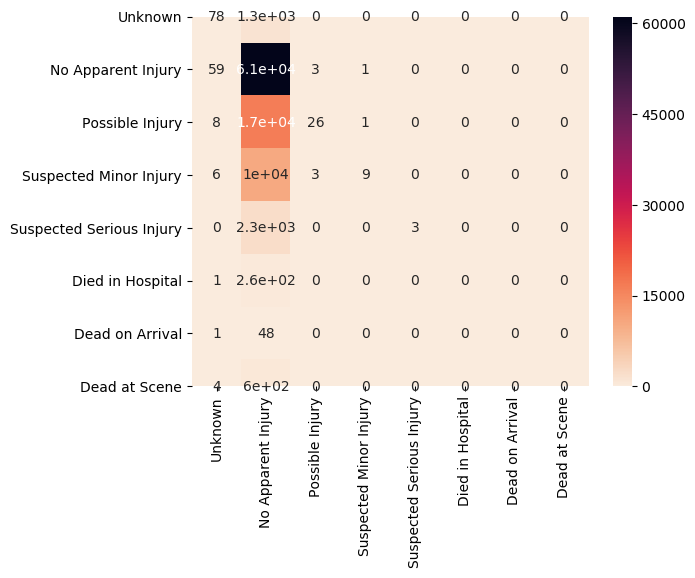

In [16]:
y_pred = clf.predict(X_train)
cf = confusion_matrix(y_train, y_pred)
df_cm = pd.DataFrame(cf, index = severity_names,
                     columns = severity_names)
sns.heatmap(df_cm, annot=True, cmap=sns.cm.rocket_r)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight
from keras.utils import to_categorical
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
print(np.unique(y_train), class_weight)
model = Sequential()
model.add(Dense(32, input_shape=(3,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(severity_names), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

num_epochs = 10
batch_size = 128
history = model.fit(X_train, to_categorical(y_train),
                    batch_size=batch_size, epochs=num_epochs,
                    verbose=2,
                    class_weight=class_weight,
                    validation_split=0.2)